In [23]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Init scalers
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Load dataset
titanic = pd.read_csv("titanic.csv", header=0, sep=",")

# Normalize dataset
# Normalize sex
titanic['Sex'].replace(['female','male'],[0,1],inplace=True)
# Normalize parents - if needed
# titanic = titanic[titanic['Parents'] > 2]
titanic['Parents'] = std_scaler.fit_transform(titanic[['Parents']])
# Normalize siblings
titanic['Siblings'] = std_scaler.fit_transform(titanic[['Siblings']])
# Normalize age
titanic['Age'] = std_scaler.fit_transform(titanic[['Age']])
# Normalize passenger class
p_classes = pd.get_dummies(titanic.Pclass, prefix='Class')
titanic = titanic.join(p_classes).drop(['Pclass'], axis=1)
# Normalize fare
titanic['Fare'] = std_scaler.fit_transform(titanic[['Fare']])

titanic = sk.utils.shuffle(titanic)

# Split dataset to train, test and valid
train, test = np.split(titanic, [int(.7*len(titanic))])

# Create train and test set
train_labels = train['Survived']
train_data = train.drop(['Survived', 'Name'], axis=1)
test_labels = test['Survived']
test_data = test.drop(['Survived', 'Name'], axis=1)




In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Create tensors from train and test set
train_data_tensor = torch.FloatTensor(train_data.values)
train_label_tensor = torch.LongTensor(train_labels.values)
test_data_tensor = torch.FloatTensor(test_data.values)
test_label_tensor = torch.LongTensor(test_labels.values)

In [25]:
# Initialize hyperparameters
input_size = 8
output_size = 2
hidden_size1 = 64
hidden_size2 = 56
epochs = 100
learning_rate = 0.005

# Initialize model class with layers and activation functions
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(in_features=input_size, out_features=hidden_size1)
        self.fc2 = nn.Linear(in_features=hidden_size1, out_features=hidden_size2)
        self.output = nn.Linear(in_features=hidden_size2, out_features=output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

# Create net instance, loss function and optimizer
net = Network()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [26]:
# Train model on train data tensors
loss_arr = []
for i in range(epochs):
    y_hat = net.forward(train_data_tensor)
    loss = criterion(y_hat, train_label_tensor)
    loss_arr.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 5 == 0:
        print(f'Epoch: {i} Loss: {loss}')

Epoch: 0 Loss: 0.6964073777198792
Epoch: 5 Loss: 0.5835673213005066
Epoch: 10 Loss: 0.5070026516914368
Epoch: 15 Loss: 0.45248275995254517
Epoch: 20 Loss: 0.43166932463645935
Epoch: 25 Loss: 0.4114362597465515
Epoch: 30 Loss: 0.394554078578949
Epoch: 35 Loss: 0.3857644498348236
Epoch: 40 Loss: 0.37840595841407776
Epoch: 45 Loss: 0.37191128730773926
Epoch: 50 Loss: 0.36544907093048096
Epoch: 55 Loss: 0.35898640751838684
Epoch: 60 Loss: 0.3531188368797302
Epoch: 65 Loss: 0.3469833731651306
Epoch: 70 Loss: 0.3410268723964691
Epoch: 75 Loss: 0.3350186347961426
Epoch: 80 Loss: 0.3289017975330353
Epoch: 85 Loss: 0.32260704040527344
Epoch: 90 Loss: 0.31697148084640503
Epoch: 95 Loss: 0.3116782009601593


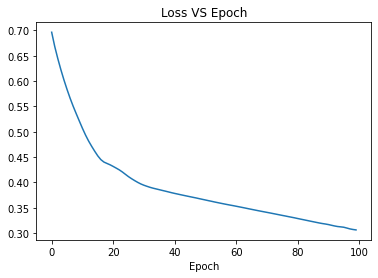

In [27]:
import matplotlib.pyplot as plt

# Plot graph of loss function
plt.title('Loss VS Epoch')
plt.xlabel("Loss")
plt.xlabel("Epoch")
plt.plot(loss_arr)

In [29]:
# Test model on test set
predictions = []
with torch.no_grad():
    for val in test_data_tensor:
        y_hat = net.forward(val)
        predictions.append(y_hat.argmax().item())

# Create dataframe with ground truth values and predicted values
df = pd.DataFrame({'Y': test_label_tensor, 'YHat': predictions})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

# Print accuracy
print("Accuracy of model is: " + str(df['Correct'].sum() / len(df)))

Accuracy of model is: 0.8277153558052435


In [ ]:
import tensorflow